In [1]:
from __future__ import division
%pylab inline
import glob
import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper')

Populating the interactive namespace from numpy and matplotlib


In [2]:
def iter_palindrome(fn):
        
    with open(fn,'r') as f:
        coords = []
        seqs = []
        name = None
        out = False

        for line in f:
            line = line.rstrip()
            if 'Palindromes of' in line:
                name = line.split()[2]
            elif ':' in line or len(line) == 0:
                continue
            else:
                if '|' in line:
                    nm = line.count('|')
                    out = True
                    continue
                else:
                    line = line.split()
                    s,e = int(line[0]),int(line[-1])
                    if s > e:
                        s,e = e,s
                    s -= 1
                    coords.append((s,e))
                    seqs.append(line[1].upper())
                    
                if out:
                    
                    G = coords[1][0]-coords[0][1]
                    
                    for (a,b),c in zip(coords,seqs):
                        yield name,a,b,c,nm/len(c),G
                        
                    out = False
                    coords = []
                    seqs = []
                    

def pal2mat(fn,minstem=5,maxstem=20,mingap=0,maxgap=20,pct_id=0.8,pidscale=False,norm=True):
    mat = np.zeros((maxstem-minstem+1,maxgap-mingap+1))
    
    nreads = 0
    for _,s,e,seq,pi,G in iter_palindrome(fn):
        nreads+=1
        L = len(seq)
        
        if (L < minstem or L > maxstem):
            continue
        if (G < mingap or G > maxgap):
            continue
        if pi < pct_id:
            continue
        
        if not pidscale:
            mat[L-minstem,G-mingap] += 1
        else:
            mat[L-minstem,G-mingap] += pct_id
    
    return mat, nreads
                
            

In [9]:
pfxs = ['../data/palindrome/multi_species_sampled_reads/homo_sapiens',
       '../data/palindrome/multi_species_sampled_reads/pan_troglodytes',
       '../data/palindrome/multi_species_sampled_reads/pan_paniscus',
       '../data/palindrome/multi_species_sampled_reads/gorilla_gorilla',
       '../data/palindrome/multi_species_sampled_reads/gorilla_berengei',
       '../data/palindrome/multi_species_sampled_reads/pongo_abelii',
       '../data/palindrome/multi_species_sampled_reads/pongo_pygmaeus',
       '../data/palindrome/multi_species_sampled_reads/chlorocebus_aethiops',
       '../data/palindrome/multi_species_sampled_reads/chlorocebus_pygerythrus',
       '../data/palindrome/multi_species_sampled_reads/chlorocebus_sabaeus',
       '../data/palindrome/multi_species_sampled_reads/macaca_mulatta',
       '../data/palindrome/multi_species_sampled_reads/macaca_fascicularis',
       '../data/palindrome/multi_species_sampled_reads/papio_anubis',
        '../data/palindrome/multi_species_sampled_reads/mouse_misat',
        '../data/palindrome/multi_species_sampled_reads/equus_caballus',
        '../data/palindrome/multi_species_sampled_reads/chicken_sim',
        '../data/palindrome/multi_species_sampled_reads/stickleback',
        '../data/palindrome/multi_species_sampled_reads/pombe.cen_core.sim_reads',
        '../data/palindrome/multi_species_sampled_reads/oryza_sativa',
        '../data/palindrome/multi_species_sampled_reads/zea_mays',
        '../data/palindrome/multi_species_sampled_reads/arabidopsis_thaliana'
        
       ]


In [ ]:
data = []

for pfx in pfxs:
    x,xn = pal2mat(pfx+'.txt',minstem=3,maxstem=10,maxgap=20,pct_id =0.8)
    y,_ = pal2mat(pfx+'.perm.s0.txt',minstem=3,maxstem=10,maxgap=20,pct_id =0.8)
    
    print pfx
    
    ratio = np.log2(np.sum(x,axis=1)/xn+1) - np.log2(np.sum(y,axis=1)/xn+1)

    d = ratio

    data.append(d)
    imshow(d.reshape(1,(len(d))),vmin=-0.001,vmax=0.25,cmap=cm.bone_r,rasterized=True,interpolation='none')
    plt.xticks([])
    plt.yticks([])
    plt.show()
        

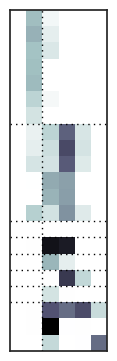

In [15]:
plt.imshow(np.array(data)[:,0:6],cmap=cm.bone_r,vmin=0.05,vmax=0.25,interpolation='none',rasterized=True)
plt.axhline(6.5,c='black',ls='dotted',lw=1)
plt.axhline(12.5,c='black',ls='dotted',lw=1)
plt.axhline(13.5,c='black',ls='dotted',lw=1)
plt.axhline(14.5,c='black',ls='dotted',lw=1)
plt.axhline(15.5,c='black',ls='dotted',lw=1)
plt.axhline(16.5,c='black',ls='dotted',lw=1)
plt.axhline(17.5,c='black',ls='dotted',lw=1)
plt.axvline(1.5,c='black',ls='dotted',lw=1)
plt.xticks([])
plt.yticks([])
plt.savefig('../figures/dyad_density.heatmap.svg')